In [1]:
import pandas as pd
import numpy as np

In [2]:
parta_df=pd.read_csv('/Users/sudhi/Desktop/BUAN 6341 ML/classification.csv')

In [3]:
parta_df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,999,blue-collar,married,basic.4y,unknown,no,yes,cellular,105.0,1,999.0,0,nonexistent,no
1,36,blue-collar,married,basic.6y,no,yes,no,cellular,125.0,5,999.0,0,nonexistent,no
2,999,admin.,single,high.school,no,no,yes,telephone,111.0,1,999.0,0,nonexistent,no
3,39,blue-collar,married,basic.6y,unknown,no,no,cellular,173.0,2,999.0,0,nonexistent,no
4,41,housemaid,married,basic.4y,unknown,no,no,cellular,107.0,1,999.0,0,nonexistent,no


In [4]:
parta_df.loc[(parta_df['age'] == 999), 'age'] = np.NaN
parta_df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,NaN,blue-collar,married,basic.4y,unknown,no,yes,cellular,105.0,1,999.0,0,nonexistent,no
1,36.0,blue-collar,married,basic.6y,no,yes,no,cellular,125.0,5,999.0,0,nonexistent,no
2,NaN,admin.,single,high.school,no,no,yes,telephone,111.0,1,999.0,0,nonexistent,no
3,39.0,blue-collar,married,basic.6y,unknown,no,no,cellular,173.0,2,999.0,0,nonexistent,no
4,41.0,housemaid,married,basic.4y,unknown,no,no,cellular,107.0,1,999.0,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,management,divorced,high.school,no,yes,no,telephone,19.0,5,999.0,0,nonexistent,no
4115,68.0,retired,married,basic.4y,no,yes,no,cellular,177.0,1,999.0,0,nonexistent,no
4116,30.0,blue-collar,married,basic.9y,no,no,no,cellular,623.0,2,999.0,0,nonexistent,yes
4117,45.0,entrepreneur,single,university.degree,no,no,no,cellular,123.0,5,999.0,0,nonexistent,no


In [5]:
parta_df.isna().sum()

age          215
job            0
marital      128
education      0
default        0
housing        0
loan           0
contact        0
duration     112
campaign       0
pdays        161
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
len(parta_df.dropna())

3534

In [7]:
parta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3904 non-null   float64
 1   job        4119 non-null   object 
 2   marital    3991 non-null   object 
 3   education  4119 non-null   object 
 4   default    4119 non-null   object 
 5   housing    4119 non-null   object 
 6   loan       4119 non-null   object 
 7   contact    4119 non-null   object 
 8   duration   4007 non-null   float64
 9   campaign   4119 non-null   int64  
 10  pdays      3958 non-null   float64
 11  previous   4119 non-null   int64  
 12  poutcome   4119 non-null   object 
 13  y          4119 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 450.6+ KB


In [8]:
parta_df.describe()

,age,duration,campaign,pdays,previous
count,3904.000000,4007.000000,4119.000000,3958.000000,4119.000000
mean,40.149846,261.401547,2.590920,959.855230,0.173100
std,10.526973,271.200771,2.736604,193.274995,0.502925
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000
50%,38.000000,182.000000,2.000000,999.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000
max,95.000000,4918.000000,29.000000,999.000000,5.000000


In [9]:
parta_df['marital'].value_counts()

married     2456
single      1099
divorced     424
unknown       12
Name: marital, dtype: int64

In [10]:
parta_df.loc[(parta_df['marital'].isna()== True), 'marital'] = 'married'

In [11]:
parta_df['marital'].value_counts()

married     2584
single      1099
divorced     424
unknown       12
Name: marital, dtype: int64

In [12]:
import matplotlib as plt
import seaborn as sns 

<AxesSubplot:>

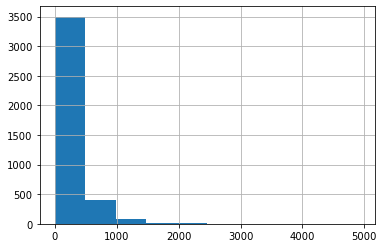

In [13]:
parta_df['duration'].hist()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

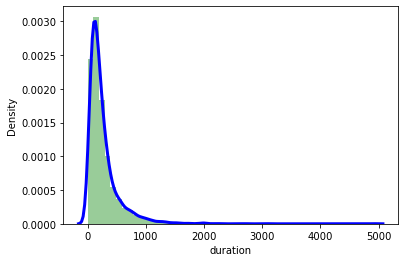

In [14]:
sns.distplot(parta_df['duration'], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})

In [15]:
parta_df.loc[(parta_df['duration'].isna()== True), 'duration'] = parta_df['duration'].median()

In [16]:
parta_df.describe()

,age,duration,campaign,pdays,previous
count,3904.000000,4119.000000,4119.000000,3958.000000,4119.000000
mean,40.149846,259.242535,2.590920,959.855230,0.173100
std,10.526973,267.798958,2.736604,193.274995,0.502925
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,104.000000,1.000000,999.000000,0.000000
50%,38.000000,182.000000,2.000000,999.000000,0.000000
75%,47.000000,313.000000,3.000000,999.000000,0.000000
max,95.000000,4918.000000,29.000000,999.000000,5.000000


In [17]:
parta_df ['pdays'].value_counts()

999.0    3802
3.0        47
6.0        45
4.0        13
7.0         7
2.0         7
12.0        6
13.0        4
9.0         4
16.0        3
8.0         3
10.0        3
14.0        3
1.0         3
5.0         2
0.0         2
11.0        1
15.0        1
22.0        1
18.0        1
Name: pdays, dtype: int64

In [18]:
parta_df['pdays'] = np.where(parta_df['pdays'].isin([3.0, 6.0, 4.0, 7.0, 2.0, 12.0, 9.0, 13.0, 1.0, 16.0, 10.0,8.0, 14.0, 5.0, 22.0, 15.0, 11.0, 18.0, 0.0]), '1', '0')

In [19]:
parta_df['pdays'].unique()

array(['0', '1'], dtype=object)

In [20]:
parta_df['pdays'].value_counts()

0    3963
1     156
Name: pdays, dtype: int64

In [21]:
parta_df.loc[(parta_df['age'].isna()== True), 'age'] = parta_df['age'].mean()

In [22]:
parta_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
parta_df.describe()

,age,duration,campaign,previous
count,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.149846,259.242535,2.590920,0.173100
std,10.248483,267.798958,2.736604,0.502925
min,18.000000,0.000000,1.000000,0.000000
25%,32.000000,104.000000,1.000000,0.000000
50%,39.000000,182.000000,2.000000,0.000000
75%,47.000000,313.000000,3.000000,0.000000
max,95.000000,4918.000000,29.000000,5.000000


In [24]:
parta_df['job'].unique()

array(['blue-collar', 'admin.', 'housemaid', 'technician',
       'self-employed', 'retired', 'management', 'unemployed', 'services',
       'student', 'entrepreneur', 'unknown'], dtype=object)

In [25]:
parta_df_dummies= [pd.get_dummies(parta_df['job'], prefix='job', prefix_sep= ':'), 
                    pd.get_dummies(parta_df['marital'], prefix='marital', prefix_sep= ':'),
                    pd.get_dummies(parta_df['poutcome'], prefix='poutcome', prefix_sep= ':')]

In [26]:
parta_df_dummies=pd.concat(parta_df_dummies, axis=1)
type(parta_df_dummies)

pandas.core.frame.DataFrame

In [27]:
parta_df=pd.concat([parta_df, parta_df_dummies], axis=1)

In [28]:
parta_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y', 'job:admin.', 'job:blue-collar', 'job:entrepreneur',
       'job:housemaid', 'job:management', 'job:retired',
       'job:self-employed', 'job:services', 'job:student',
       'job:technician', 'job:unemployed', 'job:unknown',
       'marital:divorced', 'marital:married', 'marital:single',
       'marital:unknown', 'poutcome:failure', 'poutcome:nonexistent',
       'poutcome:success'], dtype=object)

In [29]:
parta_df['education'].value_counts()

university.degree      1231
high.school             942
basic.9y                612
professional.course     530
basic.4y                418
basic.6y                223
unknown                 160
illiterate                3
Name: education, dtype: int64

In [30]:
parta_df.loc[(parta_df['education'] == 'unknown'), 'education'] = 'university.degree'

In [31]:
parta_df['education'].value_counts()

university.degree      1391
high.school             942
basic.9y                612
professional.course     530
basic.4y                418
basic.6y                223
illiterate                3
Name: education, dtype: int64

In [32]:
parta_df['education'] = parta_df['education'].map({'illiterate':0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course':5, 'university.degree':6}).astype(int)

In [33]:
parta_df['default'] = parta_df['default'].map({'no':1, 'unknown':0}).astype(int)

In [34]:
parta_df['education'].unique()

array([1, 2, 4, 5, 6, 3, 0])

In [35]:
parta_df['housing'].value_counts()

yes        2140
no         1870
unknown     109
Name: housing, dtype: int64

In [36]:
parta_df.loc[(parta_df['housing'] == 'unknown'), 'housing'] = 'yes'

In [37]:
parta_df['housing'].value_counts()

yes    2249
no     1870
Name: housing, dtype: int64

In [38]:
parta_df['loan'].value_counts()

no         3384
yes         626
unknown     109
Name: loan, dtype: int64

In [39]:
parta_df.loc[(parta_df['loan'] == 'unknown'), 'loan'] = 'no'

In [40]:
parta_df['loan'] = parta_df['loan'].map({'yes':0, 'no':1}).astype(int)

In [41]:
parta_df['contact'] = parta_df['contact'].map({'cellular':1, 'telephone':0}).astype(int)

In [42]:
parta_df['contact'].value_counts()

1    2585
0    1534
Name: contact, dtype: int64

In [43]:
parta_df['housing'] = parta_df['housing'].map({'yes':1, 'no':0}).astype(int)

In [44]:
pd.options.display.max_columns= None
parta_df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,job:admin.,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,job:unemployed,job:unknown,marital:divorced,marital:married,marital:single,marital:unknown,poutcome:failure,poutcome:nonexistent,poutcome:success
0,40.149846,blue-collar,married,1,0,0,0,1,105.0,1,0,0,nonexistent,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,36.000000,blue-collar,married,2,1,1,1,1,125.0,5,0,0,nonexistent,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
parta_df.drop('job', axis = 1, inplace = True)
parta_df.drop('marital',axis = 1, inplace = True)
parta_df.drop('poutcome',axis = 1, inplace = True)

In [47]:
parta_df.head(3)

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,y,job:admin.,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,job:unemployed,job:unknown,marital:divorced,marital:married,marital:single,marital:unknown,poutcome:failure,poutcome:nonexistent,poutcome:success
0,40.149846,1,0,0,0,1,105.0,1,0,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,36.000000,2,1,1,1,1,125.0,5,0,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,40.149846,4,1,0,0,0,111.0,1,0,0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [48]:
x = parta_df.drop('y', axis = 1)
y = parta_df['y'] # target column

In [49]:
x_train_orig, x_test_orig, y_train, y_test = train_test_split(x, y, random_state = 0, test_size=0.25)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_orig)
x_test = scaler.transform(x_test_orig)

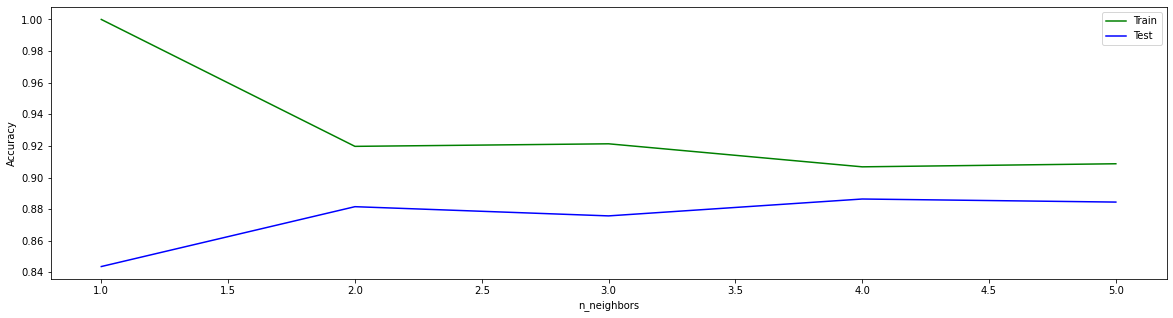

In [50]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []
x_axis= range(1,6)

for k in range(1,6):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_score_array.append(knn.score(x_train, y_train))
    test_score_array.append(knn.score(x_test, y_test))
    
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c='g', label = 'Train')
plt.plot(x_axis, test_score_array, c='b', label = 'Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
n_neighbors = range(1,6)
metric=['manhattan']

grid = dict(n_neighbors=n_neighbors,metric=metric)

grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy')

grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.889285 using {'metric': 'manhattan', 'n_neighbors': 4}


In [52]:
best_model=KNeighborsClassifier(n_neighbors= 4, metric= 'manhattan')

best_model.fit(x_train, y_train)

best_model.score(x_test, y_test)

0.8893203883495145

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

solvers = ['lbfgs']

penalty = ['l2']

c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy')

grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.900940 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [54]:
best_model_2= LogisticRegression(penalty= 'l2', C= 100, solver='lbfgs', max_iter=1000 )

best_model_2.fit(x_train, y_train)

print(best_model_2.score(x_test, y_test))

0.9058252427184466


In [55]:
# c =100
from sklearn.linear_model import LogisticRegression

model_log= LogisticRegression(C= 100, solver= 'lbfgs', penalty='l2', max_iter=1000)

model_log.fit(x_train, y_train)

a= print(model_log.score(x_train, y_train))
b= print(model_log.score(x_test, y_test))

0.9041761087730658
0.9058252427184466


In [56]:
from sklearn.linear_model import LogisticRegression

model_log= LogisticRegression(C= 10, solver= 'lbfgs', penalty='l2', max_iter=1000)

model_log.fit(x_train, y_train)

a= print(model_log.score(x_train, y_train))
b= print(model_log.score(x_test, y_test))

0.9032049206863062
0.9077669902912622


In [57]:
from sklearn.linear_model import LogisticRegression

model_log= LogisticRegression(C= 1, solver= 'lbfgs', penalty='l2', max_iter=1000)

model_log.fit(x_train, y_train)

a= print(model_log.score(x_train, y_train))
b= print(model_log.score(x_test, y_test))

0.8980252508902558
0.8970873786407767


In [58]:
from sklearn.linear_model import LogisticRegression

model_log= LogisticRegression(C= 0.1, solver= 'lbfgs', penalty='l2', max_iter=1000)

model_log.fit(x_train, y_train)

a= print(model_log.score(x_train, y_train))
b= print(model_log.score(x_test, y_test))

0.8957591453544836
0.8951456310679612


In [59]:
from sklearn.linear_model import LogisticRegression

model_log= LogisticRegression(C= 0.01, solver= 'lbfgs', penalty='l2', max_iter=1000)

model_log.fit(x_train, y_train)

a= print(model_log.score(x_train, y_train))
b= print(model_log.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()

C = [100, 10, 1.0, 0.1, 0.01]

gamma = [100, 10, 1.0, 0.1, 0.01]

grid = dict(C=C,gamma=gamma)

grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy')

grid_result = grid_search.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.898025 using {'C': 10, 'gamma': 0.01}


In [61]:
# 5
from sklearn.svm import SVC

model_svc=SVC(C=10, gamma= 0.01)

model_svc.fit(x_train, y_train)

a= (print(model_svc.score(x_train, y_train)))
b= (print(model_svc.score(x_test, y_test)))


0.8980252508902558
0.8932038834951457


In [62]:
from sklearn.svm import SVC

model_svc=SVC(C=0.01, gamma= 0.01)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [63]:
from sklearn.svm import SVC

model_svc=SVC(C=0.1, gamma= 0.01)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [64]:
from sklearn.svm import SVC

model_svc=SVC(C=1, gamma= 0.01)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8980252508902558
0.8932038834951457


In [65]:
from sklearn.svm import SVC

model_svc=SVC(C=100, gamma= 0.01)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8980252508902558
0.8932038834951457


In [66]:
from sklearn.svm import SVC

model_svc=SVC(C=1, gamma= 0.1)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8980252508902558
0.8932038834951457


In [67]:
### less difference between train & test 

from sklearn.svm import SVC

model_svc=SVC(C=0.1, gamma= 0.1)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8967303334412431
0.8932038834951457


In [68]:
from sklearn.svm import SVC

model_svc=SVC(C=0.1, gamma= 1)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [69]:
from sklearn.svm import SVC

model_svc=SVC(C=0.01, gamma= 1)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [70]:
from sklearn.svm import SVC

model_svc=SVC(C=0.1, gamma= 10)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [71]:
from sklearn.svm import SVC

model_svc=SVC(C=0.01, gamma= 10)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [72]:
from sklearn.svm import SVC

model_svc=SVC(C=0.1, gamma= 100)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [73]:
from sklearn.svm import SVC

model_svc=SVC(C=0.01, gamma= 100)

model_svc.fit(x_train, y_train)

a= print(model_svc.score(x_train, y_train))
b= print(model_svc.score(x_test, y_test))

0.8805438653285853
0.8883495145631068


In [74]:
# 6 

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_leaf= 50)

dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.893


In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=7)

dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.933
Accuracy on test set: 0.894


In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_split= 150)

dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.891


In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier( min_impurity_decrease= 0.005)

dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.895
Accuracy on test set: 0.895


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz



dtree = DecisionTreeClassifier(random_state=0, max_depth=2)

dtree.fit(x_train, y_train)

export_graphviz(dtree, out_file=None, filled=True, rounded=True)




'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="X[6] <= 0.107\\ngini = 0.21\\nsamples = 3089\\nvalue = [2720, 369]", fillcolor="#e99254"] ;\n1 [label="X[28] <= 0.5\\ngini = 0.139\\nsamples = 2733\\nvalue = [2528, 205]", fillcolor="#e78b49"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.096\\nsamples = 2633\\nvalue = [2500, 133]", fillcolor="#e68844"] ;\n1 -> 2 ;\n3 [label="gini = 0.403\\nsamples = 100\\nvalue = [28, 72]", fillcolor="#86c3ef"] ;\n1 -> 3 ;\n4 [label="X[6] <= 0.19\\ngini = 0.497\\nsamples = 356\\nvalue = [192, 164]", fillcolor="#fbede2"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.481\\nsamples = 256\\nvalue = [153, 103]", fillcolor="#f7d6be"] ;\n4 -> 5 ;\n6 [label="gini = 0.476\\nsamples = 100\\nvalue = [39, 61]", fillcolor="#b8dcf6"] ;\n4 -> 6 ;\n}'

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

model = SVR()
kernel = ['rbf']
C = [10, 1.0, 0.1]
gamma = [10, 1.0, 0.1]
epsilon=[ 0.001, 0.01, 0.1, 1 ]

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma, epsilon=epsilon)


grid_search = GridSearchCV(estimator=model, param_grid=grid)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 250, in _validate_targets
    return column_or_1d(y, warn=True).astype(np.float64, copy=False)
ValueError: could not convert string to float: 'no'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test p

ValueError: could not convert string to float: 'no'

In [80]:
parta_df.head(3)

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,y,job:admin.,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,job:unemployed,job:unknown,marital:divorced,marital:married,marital:single,marital:unknown,poutcome:failure,poutcome:nonexistent,poutcome:success
0,40.149846,1,0,0,0,1,105.0,1,0,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,36.000000,2,1,1,1,1,125.0,5,0,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,40.149846,4,1,0,0,0,111.0,1,0,0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### LAB 5

In [81]:
parta_df['y'] = parta_df['y'].map({'yes':1, 'no':0}).astype(int)

In [82]:
parta_df.head(3)

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,y,job:admin.,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,job:unemployed,job:unknown,marital:divorced,marital:married,marital:single,marital:unknown,poutcome:failure,poutcome:nonexistent,poutcome:success
0,40.149846,1,0,0,0,1,105.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,36.000000,2,1,1,1,1,125.0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,40.149846,4,1,0,0,0,111.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [83]:
x_nw = parta_df.drop('y', axis = 1)
y_nw = parta_df['y'] # target column

In [84]:
x_train_orig_nw, x_test_orig_nw, y_train_nw, y_test_nw = train_test_split(x_nw, y_nw, random_state = 0, test_size=0.25)

scaler = MinMaxScaler()
x_train_nw = scaler.fit_transform(x_train_orig_nw)
x_test_nw = scaler.transform(x_test_orig_nw)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC(random_state=0)

C = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]


# define grid search
grid = dict(C=C,gamma=gamma)


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5)
grid_result = grid_search.fit(x_train_nw, y_train_nw)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.898025 using {'C': 1, 'gamma': 0.01}


In [86]:
svc_model= SVC(random_state=0, C=1, gamma=0.01)

svc_model.fit(x_train_nw, y_train_nw)

svc_model.score(x_test_nw, y_test_nw)

0.8932038834951457

In [87]:
y_pred_nw= svc_model.predict(x_test_nw)

In [88]:
from sklearn.metrics import recall_score

recall_score(y_pred_nw, y_test_nw)

0.5641025641025641

In [89]:
from sklearn.metrics import precision_score

precision_score(y_pred_nw, y_test_nw)

0.19130434782608696

In [90]:
## Type 1 error exists 

In [91]:
## With Recall Scoring function

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC(random_state=0)

C = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]


# define grid search
grid = dict(C=C,gamma=gamma)


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='recall')
grid_result = grid_search.fit(x_train_nw, y_train_nw)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.319733 using {'C': 100, 'gamma': 0.1}


In [92]:
svc_model_2= SVC(random_state=0, C=100, gamma=0.1)

svc_model_2.fit(x_train_nw, y_train_nw)

svc_model_2.score(x_test_nw, y_test_nw)

0.8951456310679612

In [93]:
y_pred_nw_2= svc_model_2.predict(x_test_nw)

In [94]:
from sklearn.metrics import precision_score

precision_score(y_pred_nw_2, y_test_nw)

0.2782608695652174

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC(random_state=0)

C = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]


# define grid search
grid = dict(C=C,gamma=gamma)


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='precision')
grid_result = grid_search.fit(x_train_nw, y_train_nw)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.745582 using {'C': 1, 'gamma': 0.01}


In [97]:
# 7 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score


logreg=LogisticRegression(C = 1, penalty = 'l2', random_state = 0)

logreg.fit(x_train_nw, y_train_nw)

y_pred_nw_test= logreg.predict(x_test_nw)

y_pred_nw_train=logreg.predict(x_train_nw)



In [98]:
recall_score(y_pred_nw_train, y_train_nw)

0.7109375

In [99]:
recall_score(y_pred_nw_test, y_test_nw)

0.6097560975609756

In [100]:
precision_score(y_pred_nw_test, y_test_nw)

0.21739130434782608

In [101]:
np.argmin(np.abs(0.33043478260869563 - 0.5))

0

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score


logreg=LogisticRegression(C = 10, penalty = 'l2', random_state = 0)

logreg.fit(x_train_nw, y_train_nw)

y_pred_nw_test= logreg.predict(x_test_nw)

y_pred_nw_train=logreg.predict(x_train_nw)


In [103]:
recall_score(y_pred_nw_train, y_train_nw)

0.6785714285714286

In [104]:
recall_score(y_pred_nw_test, y_test_nw)

0.6785714285714286

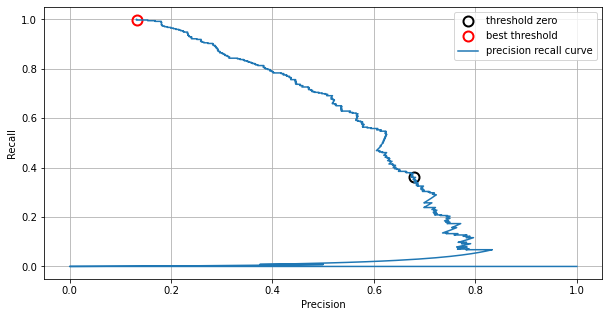

In [105]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve

plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_train_nw, logreg.decision_function(x_train_nw))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision[19], recall[19], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [106]:
from sklearn.metrics import precision_score, recall_score

y_pred_nw_test = np.where(logreg.decision_function(x_test_nw) >= 0, 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test_nw, y_pred_nw))
print('Recall: ', recall_score(y_test_nw, y_pred_nw))

Before the post processing: 
Precision:  0.5641025641025641
Recall:  0.19130434782608696


In [107]:
0.5641025641025641- 0.5

0.0641025641025641

In [108]:
####

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier()

max_depth=[1,2,3,4,5]


# define grid search
grid = dict(max_depth=max_depth)


grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring= 'recall')
grid_result = grid_search.fit(x_train_nw, y_train_nw)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.387227 using {'max_depth': 4}


In [110]:
model = DecisionTreeClassifier(max_depth= 4)

model.fit(x_train_nw, y_train_nw)

model.score(x_test_nw, y_test_nw)

0.8941747572815534

In [111]:
model = DecisionTreeClassifier(max_depth= 4)

model.fit(x_train_nw, y_train_nw)

model.score(x_test_nw, y_test_nw)

0.8951456310679612

### LAB 6 

In [112]:
from sklearn.ensemble import VotingClassifier

In [113]:
log_clf = LogisticRegression(solver = 'lbfgs', penalty = 'l2', random_state = 0)
log_clf.fit(x_train_nw, y_train_nw)

dt_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dt_clf.fit(x_train_nw, y_train_nw)

svm_clf = SVC(random_state= 0)
svm_clf.fit(x_train_nw, y_train_nw)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(x_train_nw, y_train_nw)

from sklearn.metrics import precision_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(x_train_nw, y_train_nw)
    y_pred = clf.predict(x_test_nw)
    print(clf.__class__.__name__, '%.4f'%precision_score(y_test_nw, y_pred))


LogisticRegression 0.6098
DecisionTreeClassifier 0.0000
SVC 0.5641
VotingClassifier 0.6111


In [114]:
log_clf = LogisticRegression(solver = 'lbfgs', penalty = 'l2', random_state = 0)
log_clf.fit(x_train_nw, y_train_nw)

dt_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dt_clf.fit(x_train_nw, y_train_nw)

svm_clf = SVC(random_state= 0, probability = True)
svm_clf.fit(x_train_nw, y_train_nw)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(x_train_nw, y_train_nw)

from sklearn.metrics import precision_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(x_train_nw, y_train_nw)
    y_pred = clf.predict(x_test_nw)
    print(clf.__class__.__name__, '%.4f'%precision_score(y_test_nw, y_pred))

LogisticRegression 0.6098
DecisionTreeClassifier 0.0000
SVC 0.5641
VotingClassifier 0.6207


In [115]:
# 3 
from sklearn.ensemble import BaggingClassifier

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'max_samples':[0.01, 0.05, 0.1,0.5, 1], 
              'max_features':[0.01, 0.05, 0.1,0.5, 1],
             }

bag_clf = BaggingClassifier(LogisticRegression(solver = 'lbfgs', penalty = 'l2', random_state = 0),random_state=0)
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, scoring='precision')
bag_grid.fit(x_train_nw, y_train_nw)
bag_grid.best_params_

{'max_features': 0.5, 'max_samples': 0.1}

In [117]:
bag_grid.best_params_

{'max_features': 0.5, 'max_samples': 0.1}

In [118]:
#4
bag_clf = BaggingClassifier(LogisticRegression(solver = 'lbfgs', penalty = 'l2', random_state = 0), max_features=0.5, max_samples= 0.1, random_state=0)

bag_clf.fit(x_train_nw, y_train_nw)

print('Train score: %.4f'%bag_clf.score(x_train_nw, y_train_nw))
print('Test score: %.4f'%bag_clf.score(x_test_nw, y_test_nw))

Train score: 0.8971
Test score: 0.8951


In [119]:
bag_clf = BaggingClassifier(LogisticRegression(solver = 'lbfgs', penalty = 'l2', random_state = 0), max_features=0.5, max_samples= 0.1, oob_score= True, random_state=0)

bag_clf.fit(x_train_nw, y_train_nw)

print('Train score: %.4f'%bag_clf.score(x_train_nw, y_train_nw))
print('Test score: %.4f'%bag_clf.score(x_test_nw, y_test_nw))
print('Out-of-bag score: %.4f'%bag_clf.oob_score_)

Train score: 0.8971
Test score: 0.8951
Out-of-bag score: 0.8961


In [120]:
#7 using recall function
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state = 0)

param_grid = { 'max_samples':[0.1,0.5, 1], 
              'max_features':[0.1,0.5, 1],
             'max_depth':[1,2,5]}


grid_search = GridSearchCV(estimator=rnd_clf, param_grid=param_grid, cv=5, scoring='recall')

grid_result = grid_search.fit(x_train_nw, y_train_nw)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.327842 using {'max_depth': 5, 'max_features': 0.5, 'max_samples': 0.5}


In [121]:
#8 
rnd_clf = RandomForestClassifier(max_depth= 5, max_features=0.5, max_samples=0.5, random_state = 0)

rnd_clf.fit(x_train_nw, y_train_nw)

print("Accuracy on training set: {:.4f}".format(rnd_clf.score(x_train_nw, y_train_nw)))
print("Accuracy on test set: {:.4f}".format(rnd_clf.score(x_test_nw, y_test_nw)))

Accuracy on training set: 0.9226
Accuracy on test set: 0.9019


In [122]:
#9 best hyperparameters for adaboostclassifier using recall scoring function
from sklearn.ensemble import AdaBoostClassifier

ada_clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state = 0), random_state = 0)

n_estimators=[100, 500,1000]
learning_rate=[0.1,0.5,1]

grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)

grid_search = GridSearchCV(estimator=ada_clf, param_grid=grid, cv=5, scoring= 'recall')
grid_result = grid_search.fit(x_train_nw, y_train_nw)


grid_result.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [123]:
#10 
ada_clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state = 0),learning_rate=1,n_estimators=500, random_state = 0)

ada_clf.fit(x_train_nw, y_train_nw)

print("Accuracy on training set: {:.4f}".format(ada_clf.score(x_train_nw, y_train_nw)))
print("Accuracy on test set: {:.4f}".format(ada_clf.score(x_test_nw, y_test_nw)))

Accuracy on training set: 0.9220
Accuracy on test set: 0.8961


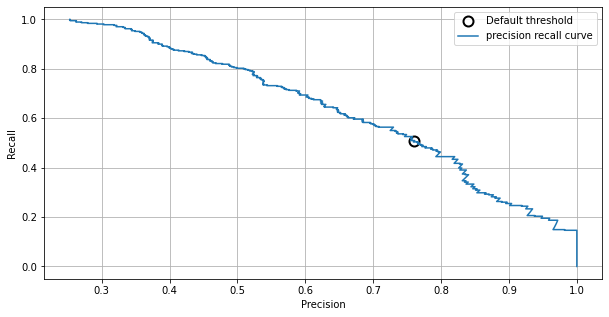

In [124]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve

plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_train_nw, ada_clf.decision_function(x_train_nw))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="Default threshold", fillstyle="none", c='k', mew=2)


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [125]:
ada_clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state = 0),learning_rate=1,n_estimators=500, random_state = 0)

ada_clf.fit(x_train_nw, y_train_nw)

y_pred = np.where(ada_clf.decision_function(x_test_nw) >= 0.49, 1, 0)

#y_pred = (ada_clf.predict_proba(x_test_nw)>= 0.49).astype(bool)

recall_score(y_test_nw, y_pred)

0.0

In [126]:
#13 
from  sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state = 0)

n_estimators=[100, 500,1000]
learning_rate=[0.1,0.5,1]
max_depth=[1,3,5]

grid = dict(n_estimators=n_estimators, learning_rate=learning_rate , max_depth=max_depth)

grid_search = GridSearchCV(estimator= gbc_clf, param_grid=grid, cv=5, scoring= 'recall')
grid_result = grid_search.fit(x_train_nw, y_train_nw)


grid_result.best_params_

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 100}

In [127]:
#14

gbc_clf = GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=100, random_state = 0)
gbc_clf.fit(x_train_nw, y_train_nw)

print("Accuracy on training set: {:.4f}".format(gbc_clf.score(x_train_nw, y_train_nw)))
print("Accuracy on test set: {:.4f}".format(gbc_clf.score(x_test_nw, y_test_nw)))

Accuracy on training set: 0.9145
Accuracy on test set: 0.9010


### LAB 7

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
x_train_pca_nw = pca.fit_transform(x_train_nw)
x_test_pca_nw = pca.transform(x_test_nw)


In [129]:
len(pca.components_)

16

In [130]:
svc_model= SVC(kernel ='rbf', gamma = 0.05, C = 10, random_state=0)

svc_model.fit(x_train_pca_nw, y_train_nw)

svc_model.score(x_test_pca_nw, y_test_nw)

0.8932038834951457

In [131]:
model = SVC(random_state=0)

C = [0.1, 1, 10]
gamma = [0.1, 1, 10]


# define grid search
grid = dict(C=C,gamma=gamma)

grid_search = GridSearchCV(estimator=model, param_grid=grid,scoring='precision_micro', cv=5)

grid_result = grid_search.fit(x_train_pca_nw, y_train_nw)

grid_result.best_params_

{'C': 1, 'gamma': 0.1}

In [132]:
model = SVC(random_state=0,C =1, gamma =0.1 )

model.fit(x_train_pca_nw, y_train_nw)

model.score(x_test_pca_nw, y_test_nw)

0.8932038834951457

In [133]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=0)

x_test_nw_reduced = lle.fit_transform(x_test_nw)

In [134]:
x_test_nw_reduced[0].mean()

0.0024854343647766107

In [135]:
x_train_nw_reduced = lle.fit_transform(x_train_nw)

In [136]:
model = SVC(kernel='rbf', random_state=0)

C = [0.1, 1, 10, 100]
gamma = [0.1, 1, 10, 100]


# define grid search
grid = dict(C=C,gamma=gamma)

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5)

grid_result = grid_search.fit(x_train_nw_reduced, y_train_nw)

grid_result.best_params_

{'C': 0.1, 'gamma': 0.1}

In [137]:
model = SVC(kernel='rbf', random_state=0,C =0.1, gamma =0.1 )

model.fit(x_train_nw_reduced, y_train_nw)

model.score(x_test_nw_reduced, y_test_nw)

0.8883495145631068